In [ ]:
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import rc
%matplotlib inline

from astropy.convolution import convolve, Gaussian1DKernel

import pickle
plt.rcParams['font.size'] = 14

In [ ]:
with open("../DESI_LAE_dataset/correct_catalog.pkl", "rb") as fh:
    spectra = pickle.load(fh)

In [ ]:
def whole_inspector(spectra, save, mode):
    n = 0
    for i in spectra:
        n += 1
        if "VI" not in i:
            print(f"No.{n} / {len(spectra)}")
            flux = i["flux"]
            wavelength = i["wavelength"]
            redshift = i["redshift"]
            ivar = i["ivar"]
            targetid = i["specid"]
            
            w = wavelength
            f = flux
            iv = np.sqrt(ivar) ** -1

            plt.close()
            plt.rcParams['figure.figsize'] = (32,8)
            plt.title(f"target ID = {targetid}\n"
                      f"Redshift = {redshift}\n", loc = 'left')
            plt.xlabel('$\lambda\ [\AA]$')
            plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
            plt.plot(w, f, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum')
            plt.plot(w, convolve(f, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum')
            plt.plot(w, iv, color = 'orange', alpha = 0.5, label = 'noise')
            plt.legend()
            plt.show()
            
            if mode == "OII":
                
                min = 3726.032 * (redshift + 1) - 25
                max = 3726.032 * (redshift + 1) + 25
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
                
            elif mode == "Lya":
                min = 1215.67 * (redshift + 1) - 25
                max = 1215.67 * (redshift + 1) + 25
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
            
            print("Is it a LAE?")
            print(f"https://www.legacysurvey.org/viewer-desi/desi-spectrum/daily/targetid{targetid}")
            again = True
            exit = False
            while again:
                try:
                    answer = int(input("-1:ignore / 0:NLAE / 1:LAE / 2:Exit"))
                    if answer == 2:
                        exit = True
                        break
                    else:
                        pass
                    i["VI"] = answer
                    again = False
                    with open(str(save) + "OII_catalog.pkl", "wb") as fh:
                        pickle.dump(spectra, fh)
                    
                except:
                    print("Only -1, 0, 1 are legal!")
            if exit == True:
                break
            else:
                pass
            
            print("===============================================================================================================================")
        else:
            pass
    return spectra

No.8 / 1877


/tmp/ipykernel_1553394/2401912567.py:15: RuntimeWarning: divide by zero encountered in reciprocal
  iv = np.sqrt(ivar) ** -1


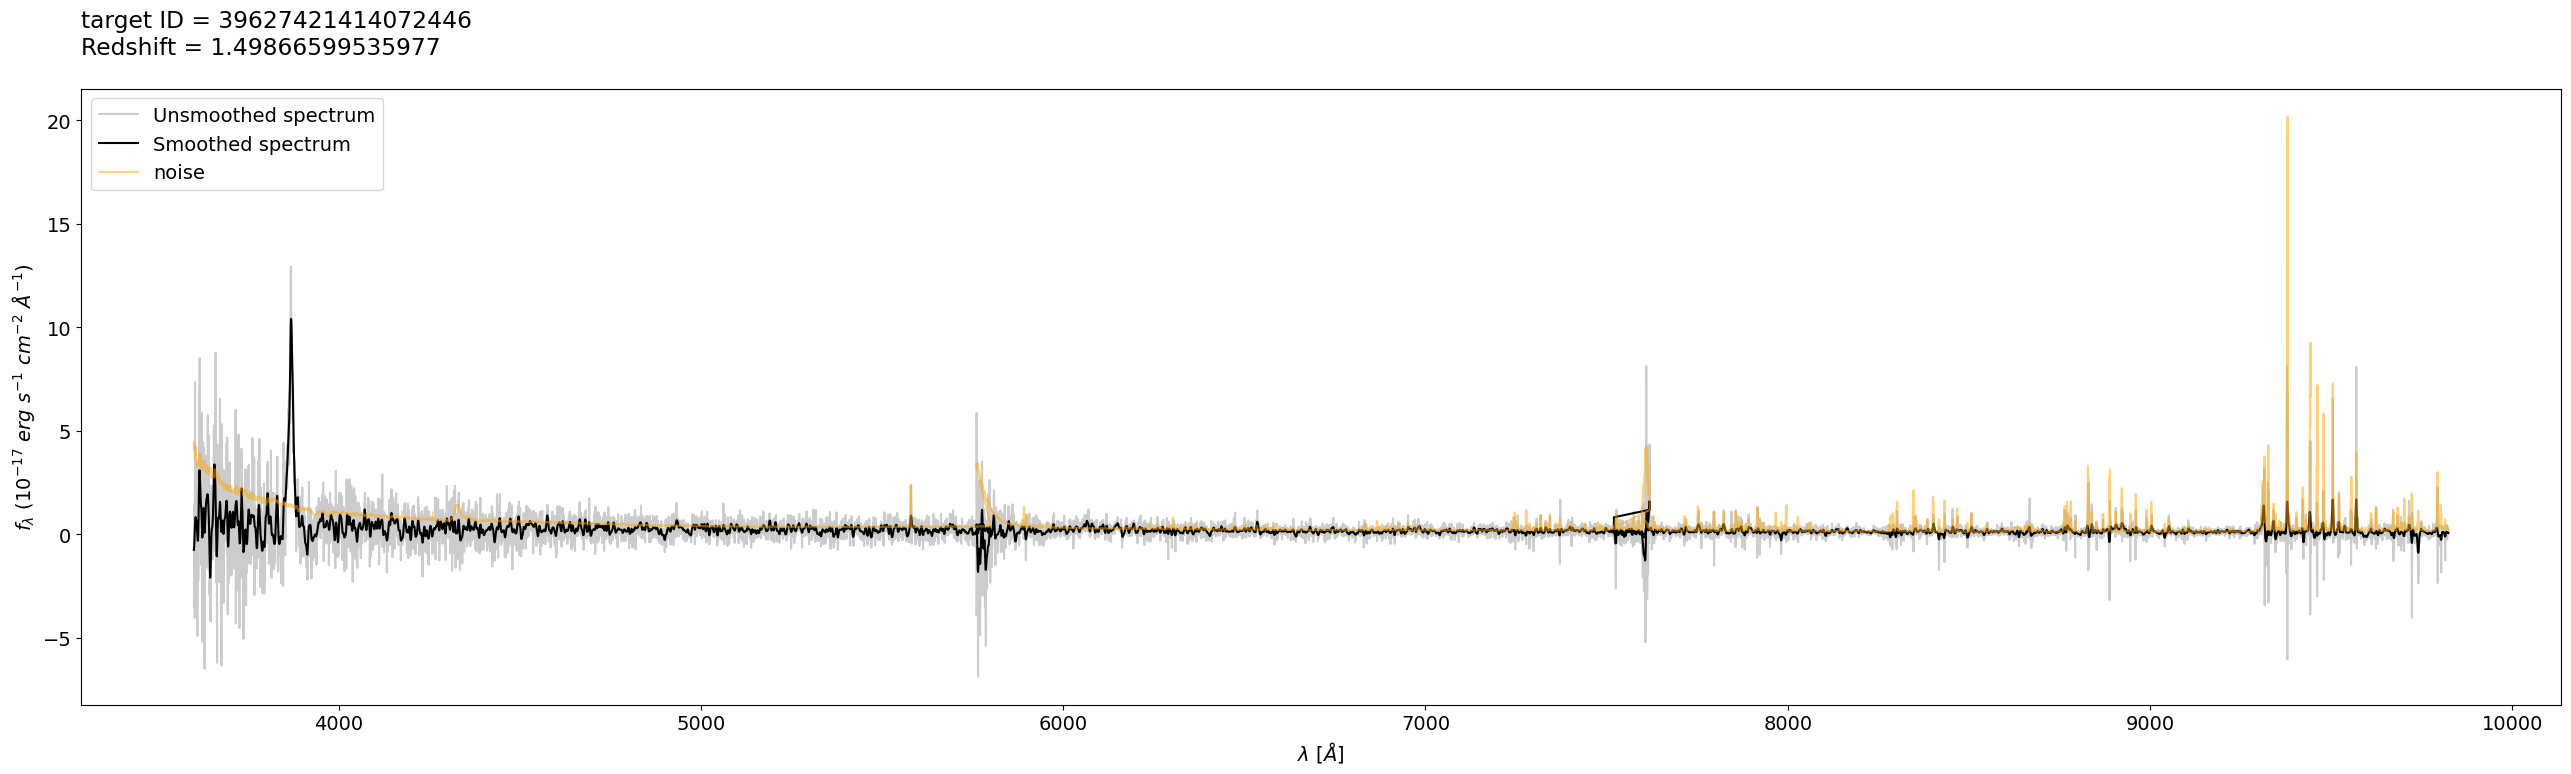

ValueError: zero-size array to reduction operation maximum which has no identity

In [28]:
spectra = whole_inspector(spectra = spectra, save = "../DESI_LAE_dataset/", mode = "Lya")